## Read Data

**import libs**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

**Read data**

In [2]:
data = pd.read_csv("../data/raw/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Exploratory data analysis

**Check if data is balanced**

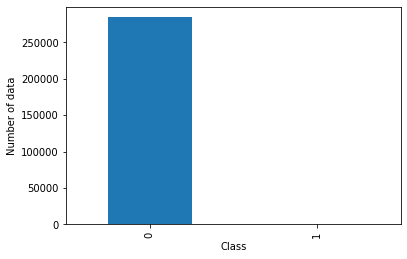

In [4]:
number_class = pd.value_counts(data['Class'], sort = False)

number_class.plot (kind='bar')
plt.xlabel ("Class")
plt.ylabel ("Number of data");

**check correlations**

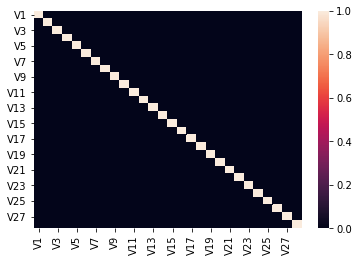

In [5]:
data_droped = data.drop(['Time','Class','Amount'],axis=1)
sns.heatmap(data_droped.corr())

### Clean Data

**remove column Time**

In [6]:
data = data.drop('Time',axis=1)

**Normalize Amount**

In [7]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

## Balance Data (UnderSample)

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
class_zero_data = data[data['Class'] == 0]
class_one_data = data[data['Class'] == 1]

class_zero_data = class_zero_data.sample(len(class_one_data))

balance_data = pd.concat([class_one_data,class_zero_data]).sample(frac=1)
balance_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8309,-4.850053,-6.398209,1.729552,-0.743804,4.818458,-3.608305,-3.609714,0.658304,0.625951,-0.133357,...,0.909443,0.644375,1.181439,-0.427476,0.296362,-0.381667,-0.203223,0.218942,0.291782,0
256334,-0.839237,0.772773,0.896316,-0.291205,1.109958,-0.259923,1.026926,-0.194910,-0.707222,-0.610249,...,-0.232444,-0.666007,-0.301846,0.531258,0.585379,0.507216,-0.166379,0.101108,-0.227729,0
230076,-0.067672,4.251181,-6.540388,7.283657,0.513541,-2.635066,-1.865911,0.780272,-3.868248,-4.851487,...,0.415437,-0.469938,0.007128,-0.388147,-0.493398,0.466468,0.566370,0.262990,-0.350151,1
202441,1.891919,0.185710,-0.150000,3.664692,0.154553,0.843892,-0.495941,0.143175,-0.240792,1.355165,...,0.179145,0.616813,-0.003629,-1.005149,-0.043476,0.145926,0.013208,-0.037412,-0.233487,0
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126645,1.159517,-0.592162,0.860648,-0.872201,-1.141889,-0.075896,-0.888678,0.365928,1.860072,-0.896533,...,0.043879,0.277367,0.004999,-0.012688,0.330159,-0.667488,0.093276,0.017396,-0.349231,0
258665,0.132376,0.694675,0.505086,1.879268,0.670572,1.401024,0.444304,0.241010,-0.196539,0.157420,...,-0.246704,-0.335669,-0.158879,-1.456372,-0.400585,-0.359877,0.269723,0.178686,-0.197304,0
185025,-0.970330,-0.013556,0.926402,-3.158566,-0.721942,-0.367880,-0.410573,0.528887,-2.483889,0.570433,...,-0.153988,-0.154553,-0.399607,-0.510676,0.777151,-0.088570,0.131410,0.017177,-0.313249,0
281717,-0.304966,0.420950,1.171700,-0.619372,0.064120,0.173667,0.487937,0.054126,0.029064,-0.695175,...,0.279931,0.761105,-0.049316,0.535921,-0.428542,0.672961,0.100695,0.171084,-0.077361,0


## Spit Data

In [13]:
X = balance_data.drop('Class',axis=1)
y = balance_data['Class']
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)

### Model test

In [17]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)

In [18]:
recall_acc

0.8881987577639752